In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns


In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin','bmi', 'pedigree', 'age', 'label']
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
data = pd.read_csv(url, header=None, names=col_names)
print(data.shape)
print(data.head())


(768, 9)
   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1


In [3]:
data.isnull().sum()

,0
pregnant,0
glucose,0
bp,0
skin,0
insulin,0
bmi,0
pedigree,0
age,0
label,0


In [4]:
feature_cols = ['pregnant','insulin', 'bmi',
'age', 'glucose','bp', 'pedigree']
x=data[feature_cols]
y=data.label

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(614, 7)

(614,)

(154, 7)

(154,)

In [6]:
model= LogisticRegression(solver='lbfgs', max_iter=1000)


In [7]:
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [8]:
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage :', int(Accuracy_score*100), '%')


Confusion Matrix: [[88 12]
 [19 35]]
Accuracy Score :  0.7987012987012987
Accuracy in Percentage : 79 %


<Axes: xlabel='Predicted', ylabel='Actual'>

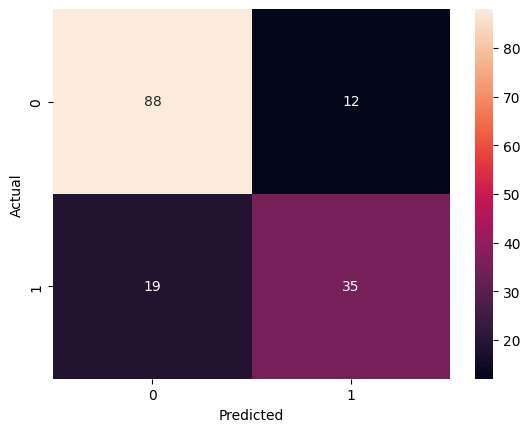

In [9]:
import seaborn as sns  # or as sn, but sns is more common

conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_mat, annot=True)

In [12]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

# Step 1: Load the dataset
# Replace the path below with the actual path to your .dta file
df = pd.read_stata('https://stats.idre.ucla.edu/stat/data/binary.dta')  # UCLA dataset

# Step 2: Convert 'rank' to categorical (if not already)
df['rank'] = df['rank'].astype('category')

# Step 3: Fit logistic regression model
model = smf.logit('admit ~ gre + gpa + C(rank)', data=df).fit()

# Step 4: Print the model summary
print("\n=== Logistic Regression Summary ===\n")
print(model.summary())

# Step 5: Calculate odds ratios and 95% confidence intervals
params = model.params
conf = model.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']

print("\n=== Odds Ratios with 95% Confidence Intervals ===\n")
print(np.exp(conf))


Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6

=== Logistic Regression Summary ===

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:                 0.08292
Time:                        17:01:19   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.9900      1.140     -3.500      0.000    

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

Confusion Matrix:
[[120  31]
 [ 30  50]]


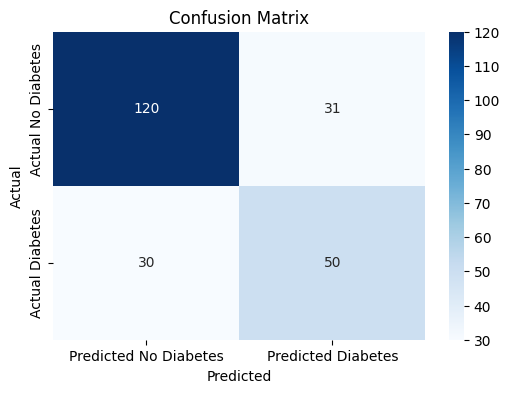

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

# Split the dataset into features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Diabetes', 'Predicted Diabetes'],
            yticklabels=['Actual No Diabetes', 'Actual Diabetes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Confusion Matrix:
[[2 0]
 [0 1]]


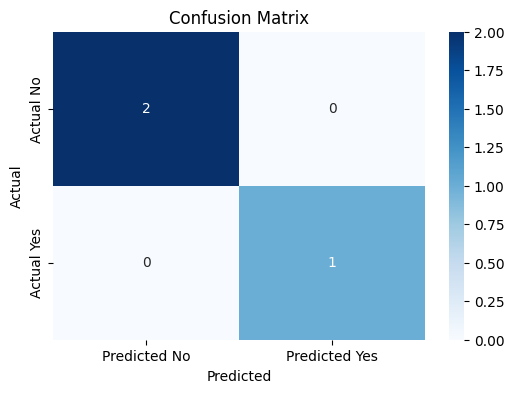

Probability that new customer buys the product: 0.69
Predicted Purchase (1=Yes, 0=No): 1


In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create sample data
# Features: Age, Gender (0=F,1=M), Previous Purchase Count
data = {
    'Age': [25, 40, 33, 22, 35, 28, 45, 38, 50, 27],
    'Gender': [0, 1, 1, 0, 0, 1, 1, 0, 1, 0],
    'Prev_Purchases': [3, 0, 1, 5, 2, 1, 0, 3, 1, 4],
    'Bought_Product': [1, 0, 0, 1, 1, 0, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# Step 2: Prepare feature matrix X and target vector y
X = df[['Age', 'Gender', 'Prev_Purchases']]
y = df['Bought_Product']

# Step 3: Stratified train-test split to keep class proportions balanced
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 4: Create and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate on test set
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Step 6: Predict probability for a new customer
# Example new customer: Age=30, Gender=Female(0), Previous Purchases=2
new_customer = pd.DataFrame([[30, 0, 2]], columns=['Age', 'Gender', 'Prev_Purchases'])

probability = model.predict_proba(new_customer)[0][1]  # Probability of buying product
print(f"Probability that new customer buys the product: {probability:.2f}")

# Optional: predict yes/no with 0.5 threshold
prediction = model.predict(new_customer)[0]
print("Predicted Purchase (1=Yes, 0=No):", prediction)
